# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [4]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt
import seaborn as sns


**Step 2:** Load the dataset _(done for you)_.

In [5]:

iris_data = load_iris()


In [14]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    return pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    

df_iris = create_df()
df_iris["target"] = iris_data.target
df_iris["class"] = iris_data.target_names[iris_data.target]
df_iris.columns = [col.replace("(cm)", "").strip() for col in df_iris.columns]
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
91,6.1,3.0,4.6,1.4,1,versicolor
122,7.7,2.8,6.7,2.0,2,virginica
43,5.0,3.5,1.6,0.6,0,setosa
119,6.0,2.2,5.0,1.5,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
14,5.8,4.0,1.2,0.2,0,setosa
65,6.7,3.1,4.4,1.4,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
53,5.5,2.3,4.0,1.3,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica


In [15]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [16]:

#From our data we will only get variable columns as np.array
x = df_iris.iloc[:, :4].values
y = df_iris.iloc[:, 4].values

In [17]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [18]:
mergings = linkage(x, method='complete')

In [19]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

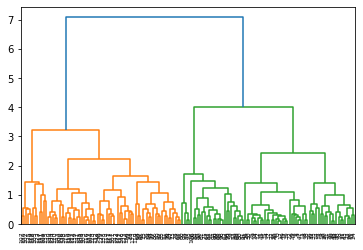

In [21]:
dn = dendrogram(mergings,leaf_rotation=90,leaf_font_size=6)
plt.show()

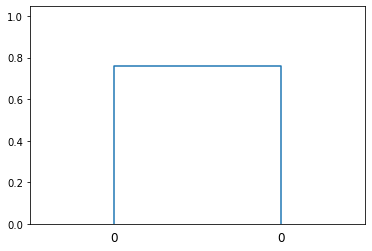

In [74]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [39]:
from sklearn.cluster import KMeans

df = pd.read_csv('./datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('./datasets/ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [23]:
model = KMeans(n_clusters=3)

In [24]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [25]:
model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [26]:
labels = model.predict(points)
print(labels)

[2 1 0 0 1 1 0 2 1 1 0 2 1 0 1 2 0 0 2 0 1 2 1 2 2 1 2 2 2 1 0 0 0 1 2 1 2
 2 1 2 2 0 1 1 1 2 2 0 2 0 0 0 2 2 2 1 2 2 1 0 1 2 2 0 0 1 0 1 1 2 0 1 0 2
 0 1 2 2 2 0 2 1 0 1 1 1 1 2 2 0 1 0 1 2 2 2 0 1 1 0 1 2 1 0 2 0 0 0 1 1 2
 1 0 1 1 1 2 1 0 0 2 2 2 2 2 1 0 2 1 1 0 0 1 2 1 2 0 1 0 2 0 0 2 0 0 2 0 1
 2 2 2 0 0 1 0 1 2 2 0 1 0 0 0 1 2 2 1 0 0 2 2 0 2 2 1 2 0 0 0 2 2 0 2 0 0
 2 1 0 2 2 2 2 1 0 2 1 1 1 2 1 2 2 1 0 0 2 0 2 2 1 1 2 0 1 0 2 0 1 2 1 1 1
 1 0 0 0 2 2 1 2 0 1 2 2 1 2 0 0 0 0 0 1 2 2 0 0 2 1 0 1 1 2 2 1 1 1 2 0 2
 1 2 0 0 0 0 0 2 2 1 2 2 1 0 0 1 2 0 0 1 1 2 2 2 1 1 2 0 1 1 0 2 2 2 1 2 2
 2 1 1 1]


In [119]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [98]:
points

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008,

In [31]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []


    for i in range(labels.shape[0]):

        if labels[i] == 0:

           data_0.append( points[i] )

        if labels[i] == 1:

           data_1.append( points[i] )

        if labels[i] == 2:

           data_2.append( points[i] )

    data_0 = np.array(data_0)
    data_1 = np.array(data_1)
    data_2 = np.array(data_2)

    return data_0,data_1,data_2


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(94, 2)
(95, 2)
(111, 2)


In [3]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

NameError: name 'data_0' is not defined

In [130]:
data_0

array([[ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [ 1.21990375,  0.74643463],
       [ 1.35999602,  0.94995827],
       [ 0.90629995,  1.09105162],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [ 0.86358809,  1.06824613],
       [ 1.33423684,  0.7721489 ],
       [ 1.19480152,  1.04788556],
       [ 0.9917477 ,  0.89202008],
       [ 1.10390926,  1.02481182],
       [ 1.04335676,  0.82345905],
       [ 0.87065059,  1.08052841],
       [ 1.40267313,  1.07525119],
       [ 0.80111157,  1.28342825],
       [ 0.9138436 ,  1.51126532],
       [ 0.94163014,  1.35399335],
       [ 0.56994768,  1.07036606],
       [ 0.90612186,  0.91084011],
       [ 0.70380566,  1.00025804],
       [ 1.31473221,  0.98614978],
       [ 0.9193121 ,  0.82371485],
       [ 1.01568202,  1.13481667],
       [ 0.61306599,  1.78210384],
       [ 1.22038503,  1.1959793 ],
       [ 0.87959517,  1.11566491],
       [ 1.32738556,  0.67759969],
       [ 0.47639   ,

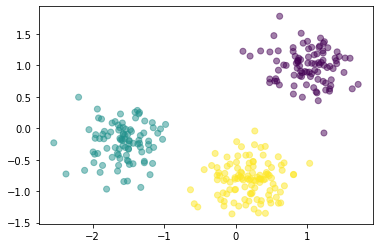

In [32]:
# plotting the data 
plt.scatter(points[:,0], points[:,1], alpha=0.5, c=labels)

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [38]:

new_labels = model.predict(new_points)
print(new_labels)


[0 0 1 1 2 2 0 2 2 1 2 2 1 2 0 0 2 0 0 2 0 0 1 0 1 2 1 0 0 0 1 2 2 1 1 0 1
 1 1 1 0 2 1 2 1 1 2 0 1 1 0 0 2 0 2 0 1 0 1 1 1 2 2 2 1 1 2 1 2 1 0 0 0 2
 1 2 2 2 0 2 0 2 0 2 0 1 0 2 1 2 0 0 1 1 0 0 0 1 2 1]


In [ ]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [35]:
#separate the data by labels like we did before
def separate_new_labels(new_labels, new_points):
    new_0 = []
    new_1 = []
    new_2 = []


    for i in range(new_labels.shape[0]):

        if new_labels[i] == 0:

           new_0.append( new_points[i] )

        if new_labels[i] == 1:

           new_1.append( new_points[i] )

        if new_labels[i] == 2:

           new_2.append( new_points[i] )

    new_0 = np.array(new_0)
    new_1 = np.array(new_1)
    new_2 = np.array(new_2)

    return new_0,new_1,new_2


new_0,new_1,new_2 =separate_labels(new_labels, new_points)

print(new_0.shape)
print(new_1.shape)
print(new_2.shape)



(34, 2)
(34, 2)
(32, 2)


In [36]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

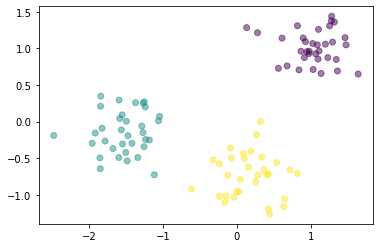

In [41]:
#plot the new labels
plt.scatter(new_points[:,0], new_points[:,1], alpha=0.5, c=new_labels)


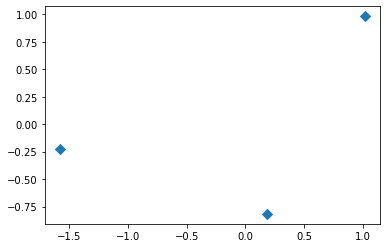

In [42]:
#plot all the points together
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()